# How Far Can Damian Lillard Take the Milwaukee Bucks? - 2023-2024 NBA Season Simulation

In this project, Monte Carlo Simulations as used to forecast the season outlook for the Milwaukee Bucks and predict the NBA Champion as of December 14, 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import statistics

In [2]:
def DatasetSlicer(Team, dataset):
    Team_masterdf=dataset[(dataset["Away Team"]==Team) | (dataset["Home Team"]==Team)].iloc[:,2:6]
    
    Team_df=pd.DataFrame(columns=["Team", "Opponent", "Team Points", "Opponent Points"])
    for game in range(len(Team_masterdf)):
        if Team in Team_masterdf.iloc[game,0]:
            Team_df.at[game,"Team"]=Team
            Team_df.at[game, "Opponent"]=Team_masterdf.iloc[game,2]
            Team_df.at[game, "Team Points"]=int(Team_masterdf.iloc[game,1])
            Team_df.at[game, "Opponent Points"]=int(Team_masterdf.iloc[game,3])
        elif Team in Team_masterdf.iloc[game,2]:
            Team_df.at[game,"Team"]=Team
            Team_df.at[game, "Opponent"]=Team_masterdf.iloc[game,0]
            Team_df.at[game, "Team Points"]=int(Team_masterdf.iloc[game,3])
            Team_df.at[game, "Opponent Points"]=int(Team_masterdf.iloc[game,1])
    
    return Team_df

In [3]:
def DatasetTransformer(Team1_df, Team2_df):
    Team1_df_TeamPoints=Team1_df["Team Points"].astype(int) 
    Team1_df_OppPoints=Team1_df["Opponent Points"].astype(int) 
    Team2_df_TeamPoints=Team2_df["Team Points"].astype(int) 
    Team2_df_OppPoints=Team2_df["Opponent Points"].astype(int) 
    
    global datasets
    global transformation
    
    datasets=[Team1_df_TeamPoints, Team1_df_OppPoints, Team2_df_TeamPoints, Team2_df_OppPoints]
    names=["Team 1 Team Points", "Team 1 Opponent Points", "Team 2 Team Points", "Team 2 Opponent Points"]
    transformation_dict={0:"log_team_t1_",1:"log_opp_t1_",2:"log_team_t2_",3:"log_opp_t2_"}
    transformation=""
    for ind, dataset in enumerate(datasets):
        nd=shapiro_test(dataset, names[ind])
        if nd==False:
           # print(f"In game {season_game_number}, {names[ind]} is not normally distributed")
            dataset=np.log(dataset)
            datasets[ind]=dataset
            transformation=transformation+transformation_dict[ind]
        
    #if transformation!="":
       # print(transformation)
    return datasets, transformation
                

In [4]:
def gameSim(datasets, transformation):
    global Team1_score
    global Team2_score
    
    Team1_mean_points_for=round(datasets[0].mean(),2)
    Team1_std_points_for=round(datasets[0].std(),2)

    Team1_mean_points_against=round(datasets[1].mean(),2)
    Team1_std_points_against=round(datasets[1].std(),2)
    
    Team2_mean_points_for=round(datasets[2].mean(),2)
    Team2_std_points_for=round(datasets[2].std(),2)

    Team2_mean_points_against=round(datasets[3].mean(),2)
    Team2_std_points_against=round(datasets[3].std(),2)
    
    if transformation=="log_team_t1_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2

    elif transformation=="log_team_t1_log_opp_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_log_team_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t1_log_team_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_log_opp_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t1_log_opp_t1_log_team_t2_log_opp_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
                      
    if int(round(Team1_score)) > int(round(Team2_score)):
        return 1
    elif int(round(Team1_score)) < int(round(Team2_score)):
        return -1
    else: 
        return 0

In [5]:
def SeriesSim(Team1, Team2, series,data):
    Team1_df=DatasetSlicer(Team1, data)
    Team2_df=DatasetSlicer(Team2,data)
    
    DatasetTransformer(Team1_df, Team2_df)
    
    Team1_game_scores = []
    Team2_game_scores = []
    for i in range(series):
        game=gameSim(datasets, transformation)
        Team1_game_scores.append(Team1_score)
        Team2_game_scores.append(Team2_score)
        
    global ave_Team1_game_scores
    global ave_Team2_game_scores
    ave_Team1_game_scores=round(sum(Team1_game_scores)/len(Team1_game_scores))
    ave_Team2_game_scores=round(sum(Team2_game_scores)/len(Team2_game_scores))

    return Team1, ave_Team1_game_scores, Team2, ave_Team2_game_scores

In [6]:
def shapiro_test(df, name=""):
    stat, p = stats.normaltest(df)
    alpha = 0.05
    
    if p > alpha:
        #print(f"{name} looks normally distributed (fail to reject H0)")
        return True
    else:
        #print(f"{name} does not look normally distributed (reject H0)")
        return False

# Data Exploration

In [7]:
eastern_conference_teams=['Boston Celtics', 'Washington Wizards', 'Atlanta Hawks', 'Detroit Pistons',  
                          'Cleveland Cavaliers', 'Philadelphia 76ers',  'New York Knicks', 'Miami Heat', 
                          'Toronto Raptors', 'Brooklyn Nets', 'Orlando Magic','Chicago Bulls', 'Indiana Pacers',  
                          'Milwaukee Bucks', 'Charlotte Hornets']

western_conference_teams=['Los Angeles Lakers', 'Phoenix Suns', 'Houston Rockets', 'Minnesota Timberwolves', 
                          'New Orleans Pelicans', 'Oklahoma City Thunder', 'Sacramento Kings', 'Dallas Mavericks', 
                          'Portland Trail Blazers', 'Denver Nuggets','Los Angeles Clippers', 'Golden State Warriors', 
                          'Memphis Grizzlies','Utah Jazz', 'San Antonio Spurs']

In [8]:
master_game_list=pd.read_csv("C:/Users/rprat/OneDrive/Documents/Youtube/How Far Can Damian Lillard Take The Bucks/Project Data/2023-2024 NBA Schedule - Played and Unplayed Games.csv")

In [9]:
played_games=master_game_list.iloc[0:348,:].reset_index(drop=True)
unplayed_games=master_game_list.iloc[348:,:].reset_index(drop=True)

In [10]:
played_games

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
0,"Tue, Oct 24, 2023",7:30p,Los Angeles Lakers,107.0,Denver Nuggets,119.0,Ball Arena,NaN
1,"Tue, Oct 24, 2023",10:00p,Phoenix Suns,108.0,Golden State Warriors,104.0,Chase Center,NaN
2,"Wed, Oct 25, 2023",7:00p,Houston Rockets,86.0,Orlando Magic,116.0,Amway Center,NaN
3,"Wed, Oct 25, 2023",7:00p,Boston Celtics,108.0,New York Knicks,104.0,Madison Square Garden (IV),NaN
4,"Wed, Oct 25, 2023",7:00p,Washington Wizards,120.0,Indiana Pacers,143.0,Gainbridge Fieldhouse,NaN
...,...,...,...,...,...,...,...,...
343,"Wed, Dec 13, 2023",8:00p,Memphis Grizzlies,104.0,Houston Rockets,117.0,Toyota Center,NaN
344,"Wed, Dec 13, 2023",8:00p,Indiana Pacers,126.0,Milwaukee Bucks,140.0,Fiserv Forum,NaN
345,"Wed, Dec 13, 2023",8:00p,Los Angeles Lakers,122.0,San Antonio Spurs,119.0,Frost Bank Center,NaN
346,"Wed, Dec 13, 2023",9:00p,Brooklyn Nets,116.0,Phoenix Suns,112.0,Footprint Center,NaN


In [11]:
bucks_played_games=len(played_games[(played_games["Away Team"]=="Milwaukee Bucks")|(played_games["Home Team"]=="Milwaukee Bucks")])

played_games_per_team=[]
for i in list(played_games["Away Team"].unique()):
    team_played_games=len(played_games[(played_games["Away Team"]==i)|(played_games["Home Team"]==i)])
    played_games_per_team.append(team_played_games)

print(f"Each team has played roughly", round(sum(played_games_per_team)/len(played_games_per_team)),"games so far.")
print(f"The Milwaukee Bucks have played", bucks_played_games,"games so far.")
print(round((bucks_played_games/80)*100,2),"% of the NBA season completed.")

Each team has played roughly 23 games so far.
The Milwaukee Bucks have played 24 games so far.
30.0 % of the NBA season completed.


In [12]:
#Eastern Current Standings
eastern_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in eastern_conference_teams:
    team_win_count=0
    Team_df_played_season=DatasetSlicer(team, played_games)
    for i in range(len(Team_df_played_season)):
        if Team_df_played_season.iloc[i,2]>Team_df_played_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/len(Team_df_played_season)
    row=[team, team_win_count, len(Team_df_played_season)-team_win_count, win_percentage]
    eastern_conference_standings.loc[len(eastern_conference_standings)]=row
    
eastern_conference_standings=eastern_conference_standings.sort_values("%", ascending=False)
eastern_conference_standings.reset_index(drop=True)

,Team,W,L,%
0,Boston Celtics,17,5,0.772727
1,Milwaukee Bucks,17,7,0.708333
2,Philadelphia 76ers,16,7,0.695652
3,Orlando Magic,16,7,0.695652
4,Indiana Pacers,13,9,0.590909
5,Miami Heat,14,10,0.583333
6,New York Knicks,13,10,0.565217
7,Brooklyn Nets,13,10,0.565217
8,Cleveland Cavaliers,13,11,0.541667
9,Toronto Raptors,10,14,0.416667


In [13]:
#Western Current Standings
western_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in western_conference_teams:
    team_win_count=0
    Team_df_played_season=DatasetSlicer(team, played_games)
    for i in range(len(Team_df_played_season)):
        if Team_df_played_season.iloc[i,2]>Team_df_played_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/len(Team_df_played_season)
    row=[team, team_win_count, len(Team_df_played_season)-team_win_count, win_percentage]
    western_conference_standings.loc[len(western_conference_standings)]=row
    
western_conference_standings=western_conference_standings.sort_values("%", ascending=False)
western_conference_standings.reset_index(drop=True)

,Team,W,L,%
0,Minnesota Timberwolves,17,5,0.772727
1,Oklahoma City Thunder,15,7,0.681818
2,Dallas Mavericks,15,8,0.652174
3,Denver Nuggets,16,9,0.640000
4,Los Angeles Lakers,15,10,0.600000
5,Sacramento Kings,13,9,0.590909
6,Houston Rockets,12,9,0.571429
7,Los Angeles Clippers,13,10,0.565217
8,New Orleans Pelicans,14,11,0.560000
9,Phoenix Suns,13,11,0.541667


In [14]:
bucks_df=played_games[(played_games["Away Team"]=="Milwaukee Bucks")|(played_games["Home Team"]=="Milwaukee Bucks")]
bucks_df

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
14,"Thu, Oct 26, 2023",7:30p,Philadelphia 76ers,117.0,Milwaukee Bucks,118.0,Fiserv Forum,NaN
36,"Sun, Oct 29, 2023",7:00p,Atlanta Hawks,127.0,Milwaukee Bucks,110.0,Fiserv Forum,NaN
46,"Mon, Oct 30, 2023",8:00p,Miami Heat,114.0,Milwaukee Bucks,122.0,Fiserv Forum,NaN
55,"Wed, Nov 1, 2023",7:00p,Milwaukee Bucks,111.0,Toronto Raptors,130.0,Scotiabank Arena,NaN
72,"Fri, Nov 3, 2023",7:30p,New York Knicks,105.0,Milwaukee Bucks,110.0,Fiserv Forum,In-Season Tournament
95,"Mon, Nov 6, 2023",7:30p,Milwaukee Bucks,129.0,Brooklyn Nets,125.0,Barclays Center,NaN
111,"Wed, Nov 8, 2023",8:00p,Detroit Pistons,118.0,Milwaukee Bucks,120.0,Fiserv Forum,NaN
117,"Thu, Nov 9, 2023",7:00p,Milwaukee Bucks,124.0,Indiana Pacers,126.0,Gainbridge Fieldhouse,NaN
128,"Sat, Nov 11, 2023",6:00p,Milwaukee Bucks,97.0,Orlando Magic,112.0,Amway Center,NaN
145,"Mon, Nov 13, 2023",8:00p,Chicago Bulls,109.0,Milwaukee Bucks,118.0,Fiserv Forum,NaN


In [15]:
bucks_df=DatasetSlicer("Milwaukee Bucks", played_games)

In [16]:
bucks_df

,Team,Opponent,Team Points,Opponent Points
0,Milwaukee Bucks,Philadelphia 76ers,118,117
1,Milwaukee Bucks,Atlanta Hawks,110,127
2,Milwaukee Bucks,Miami Heat,122,114
3,Milwaukee Bucks,Toronto Raptors,111,130
4,Milwaukee Bucks,New York Knicks,110,105
5,Milwaukee Bucks,Brooklyn Nets,129,125
6,Milwaukee Bucks,Detroit Pistons,120,118
7,Milwaukee Bucks,Indiana Pacers,124,126
8,Milwaukee Bucks,Orlando Magic,97,112
9,Milwaukee Bucks,Chicago Bulls,118,109


In [17]:
MIL_df_TeamPoints=bucks_df.iloc[:,2].astype(int)
MIL_df_OppPoints=bucks_df.iloc[:,3].astype(int)

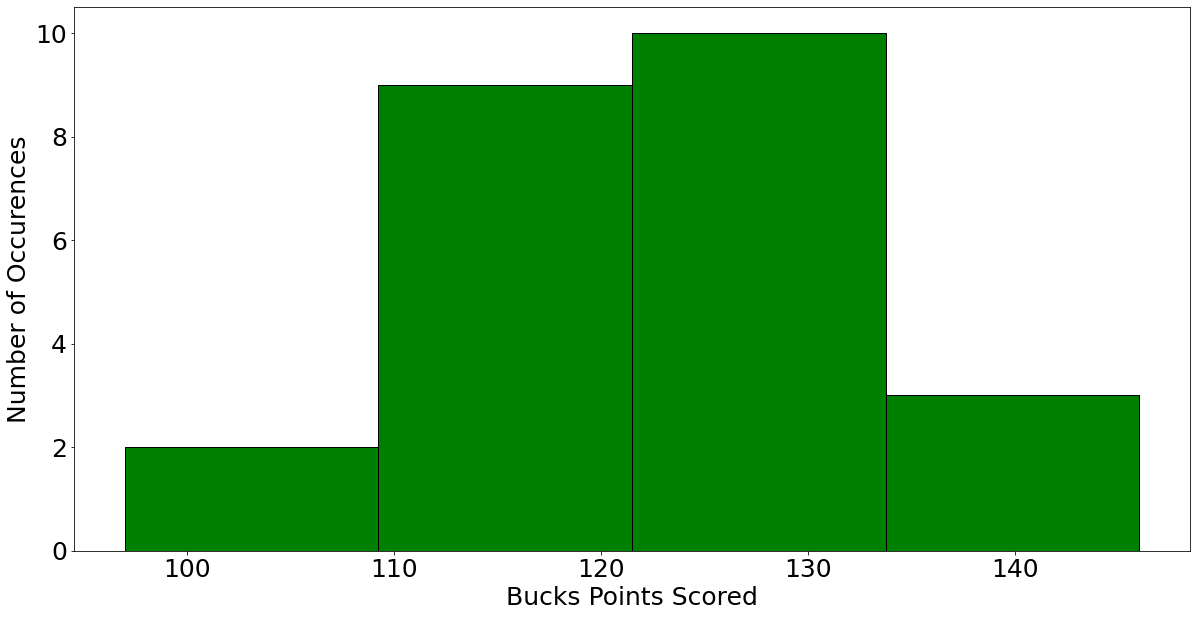

In [18]:
#Points Scored
plt.figure(figsize=(20,10))
MIL_df_TeamPoints.hist(color="green",bins=4,edgecolor="black")
#plt.axvline(np.mean(MIL_df_TeamPoints), color="red", linestyle="dashed", linewidth=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Bucks Points Scored", fontsize=25)
plt.ylabel("Number of Occurences", fontsize=25)
plt.grid(False)

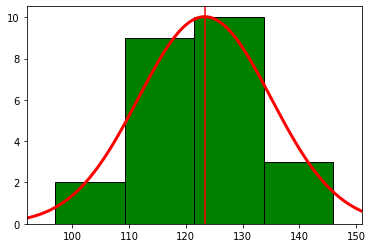

In [19]:
plt.figure(1)
result=plt.hist(MIL_df_TeamPoints, color="green",bins=4,edgecolor="black")
plt.xlim((min(MIL_df_TeamPoints)-5,max(MIL_df_TeamPoints)+5))

mean=np.mean(MIL_df_TeamPoints)
std=np.std(MIL_df_TeamPoints)
x=np.linspace(min(MIL_df_TeamPoints)-5,max(MIL_df_TeamPoints)+5,100)
dx = result[1][1] - result[1][0]
scale = len(MIL_df_TeamPoints)*dx
plt.plot(x, norm.pdf(x,mean,std)*scale, color="red", linewidth=3)
plt.axvline(np.mean(MIL_df_TeamPoints), color="red")
#plt.axvline(statistics.median(MIL_df_TeamPoints), color="blue")
#plt.axvline(statistics.mode(MIL_df_TeamPoints), color="yellow")


plt.show()

In [20]:
if shapiro_test(MIL_df_TeamPoints)==True:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")
    
if skew(MIL_df_TeamPoints)==0:
    print("The skew is 0")
elif -0.5>skew(MIL_df_TeamPoints) or 0.5>skew(MIL_df_TeamPoints):
    print("The skew is",round(skew(MIL_df_TeamPoints),2),". The skew is negligible." )
else:
    print("The skew is",round(skew(MIL_df_TeamPoints),2),". The data is skewed")

The data looks normally distributed (fail to reject H0)
The skew is -0.1 . The skew is negligible.


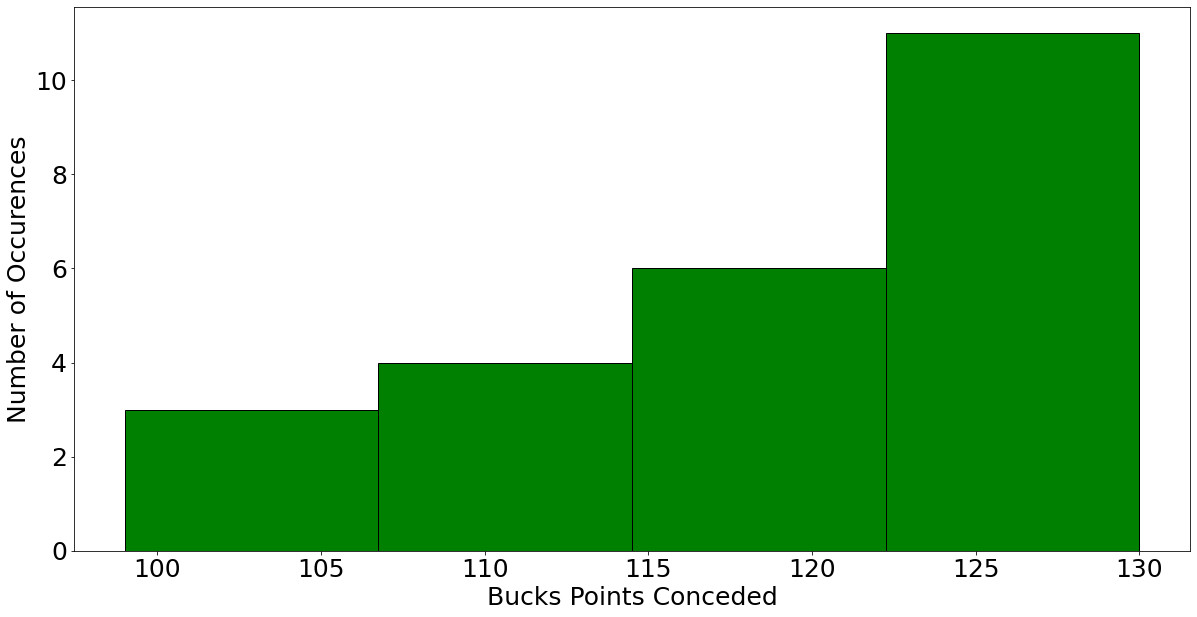

In [21]:
#Points Conceded
plt.figure(figsize=(20,10))
MIL_df_OppPoints.hist(color="green",bins=4,edgecolor="black")
#plt.axvline(np.mean(MIL_df_TeamPoints), color="red", linestyle="dashed", linewidth=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Bucks Points Conceded", fontsize=25)
plt.ylabel("Number of Occurences", fontsize=25)
plt.grid(False)

In [22]:
if shapiro_test(MIL_df_OppPoints)==True:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")
    
if skew(MIL_df_OppPoints)==0:
    print("The skew is 0")
elif -0.5<skew(MIL_df_OppPoints) or 0.5>skew(MIL_df_OppPoints):
    print("The skew is",round(skew(MIL_df_OppPoints),2),". The skew is negligible." )
else:
    print("The skew is",round(skew(MIL_df_OppPoints),2),". The data is skewed")

The data looks normally distributed (fail to reject H0)
The skew is -0.82 . The skew is negligible.


# Regular Season Simulation

In [23]:
for i in range(len(unplayed_games)):
    SeriesSim(unplayed_games.iloc[i,2],unplayed_games.iloc[i,4], 1000,played_games)
    unplayed_games.iloc[i,3]=ave_Team1_game_scores
    unplayed_games.iloc[i,5]=ave_Team2_game_scores

In [24]:
full_nba_season_results=pd.concat([played_games, unplayed_games], ignore_index=True)

In [25]:
full_nba_season_results

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
0,"Tue, Oct 24, 2023",7:30p,Los Angeles Lakers,107.0,Denver Nuggets,119.0,Ball Arena,NaN
1,"Tue, Oct 24, 2023",10:00p,Phoenix Suns,108.0,Golden State Warriors,104.0,Chase Center,NaN
2,"Wed, Oct 25, 2023",7:00p,Houston Rockets,86.0,Orlando Magic,116.0,Amway Center,NaN
3,"Wed, Oct 25, 2023",7:00p,Boston Celtics,108.0,New York Knicks,104.0,Madison Square Garden (IV),NaN
4,"Wed, Oct 25, 2023",7:00p,Washington Wizards,120.0,Indiana Pacers,143.0,Gainbridge Fieldhouse,NaN
...,...,...,...,...,...,...,...,...
1225,"Sun, Apr 14, 2024",3:30p,Phoenix Suns,110.0,Minnesota Timberwolves,113.0,Target Center,NaN
1226,"Sun, Apr 14, 2024",3:30p,Los Angeles Lakers,114.0,New Orleans Pelicans,114.0,Smoothie King Center,NaN
1227,"Sun, Apr 14, 2024",3:30p,Dallas Mavericks,117.0,Oklahoma City Thunder,118.0,Paycom Center,NaN
1228,"Sun, Apr 14, 2024",3:30p,Portland Trail Blazers,112.0,Sacramento Kings,114.0,Golden 1 Center,NaN


In [26]:
eastern_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in eastern_conference_teams:
    team_win_count=0
    Team_df_full_season=DatasetSlicer(team, full_nba_season_results)
    for i in range(len(Team_df_full_season)):
        if Team_df_full_season.iloc[i,2]>Team_df_full_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/80
    row=[team, team_win_count, 80-team_win_count, win_percentage]
    eastern_conference_standings.loc[len(eastern_conference_standings)]=row

In [27]:
eastern_conference_standings=eastern_conference_standings.sort_values("%", ascending=False)
eastern_conference_standings.reset_index(drop=True)
eastern_conference_standings.index=np.arange(1, len(eastern_conference_standings)+1)
eastern_conference_standings

,Team,W,L,%
1,Boston Celtics,74,6,0.9250
2,Philadelphia 76ers,74,6,0.9250
3,Orlando Magic,64,16,0.8000
4,Milwaukee Bucks,55,25,0.6875
5,Brooklyn Nets,47,33,0.5875
6,Indiana Pacers,46,34,0.5750
7,New York Knicks,41,39,0.5125
8,Miami Heat,39,41,0.4875
9,Cleveland Cavaliers,35,45,0.4375
10,Atlanta Hawks,30,50,0.3750


In [28]:
western_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in western_conference_teams:
    team_win_count=0
    Team_df_full_season=DatasetSlicer(team, full_nba_season_results)
    for i in range(len(Team_df_full_season)):
        if Team_df_full_season.iloc[i,2]>Team_df_full_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/80
    row=[team, team_win_count, 80-team_win_count, win_percentage]
    western_conference_standings.loc[len(western_conference_standings)]=row

In [29]:
western_conference_standings=western_conference_standings.sort_values("%", ascending=False)
western_conference_standings.reset_index(drop=True)
western_conference_standings.index=np.arange(1, len(eastern_conference_standings)+1)
western_conference_standings

,Team,W,L,%
1,Minnesota Timberwolves,71,9,0.8875
2,Oklahoma City Thunder,70,10,0.8750
3,Los Angeles Clippers,59,21,0.7375
4,Houston Rockets,57,23,0.7125
5,Denver Nuggets,51,29,0.6375
6,Dallas Mavericks,50,30,0.6250
7,Phoenix Suns,40,40,0.5000
8,Los Angeles Lakers,37,43,0.4625
9,New Orleans Pelicans,36,44,0.4500
10,Golden State Warriors,34,46,0.4250


## Play-in Tournament Simulation

### Eastern Conference Play-in 

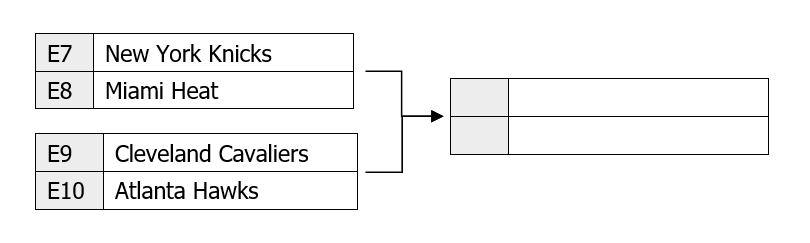

In [52]:
SeriesSim("New York Knicks", "Miami Heat", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Miami Heat beat the New York Knicks")
else:
    print("The New York Knicks beat the Miami Heat")

The New York Knicks beat the Miami Heat


In [53]:
SeriesSim("Cleveland Cavaliers", "Atlanta Hawks", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Atlanta Hawks beat the Cleveland Cavaliers")
else:
    print("The Cleveland Cavaliers beat the Atlanta Hawks")

The Cleveland Cavaliers beat the Atlanta Hawks


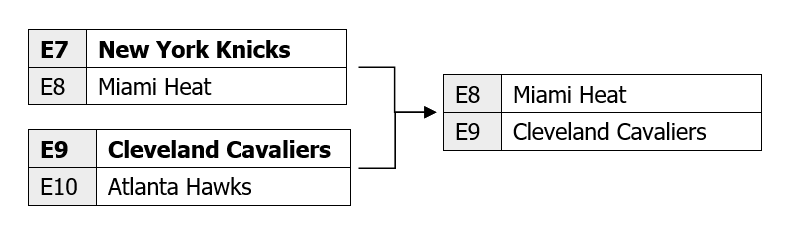

In [54]:
SeriesSim("Miami Heat", "Cleveland Cavaliers", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Cleveland Cavaliers beat the Miami Heat")
else:
    print("The Miami Heat beat the Cleveland Cavaliers")

The Miami Heat beat the Cleveland Cavaliers


The New York Knicks and Miami Heat advance to the playoffs

### Western Conference Play-in

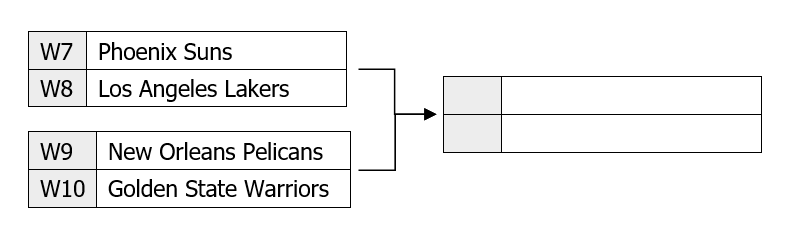

In [55]:
SeriesSim("Los Angeles Lakers", "Phoenix Suns", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Phoenix Suns beat the Los Angeles Lakers")
else:
    print("The Los Angeles Lakers beat the Phoenix Suns")

The Los Angeles Lakers beat the Phoenix Suns


In [56]:
SeriesSim("New Orleans Pelicans", "Golden State Warriors", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Golden State Warriors beat the New Orleans Pelicans")
else:
    print("The New Orleans Pelicans beat the Golden State Warriors")

The Golden State Warriors beat the New Orleans Pelicans


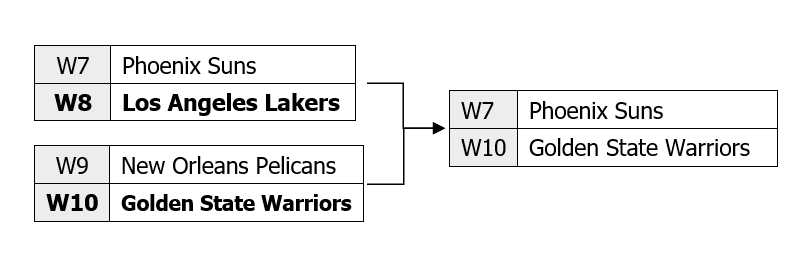

In [57]:
SeriesSim("Phoenix Suns", "Golden State Warriors", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Golden State Warriors beat the Phoenix Suns")
else:
    print("The Phoenix Suns beat the Golden State Warriors")

The Phoenix Suns beat the Golden State Warriors


The Los Angeles Lakers and the Phoenix Suns advance to the playoffs

## Playoff Simulation

In [36]:
def PlayoffSeriesSim(Team1, Team2, series):
    Team1_df=DatasetSlicer(Team1, full_nba_season_results)
    Team2_df=DatasetSlicer(Team2,full_nba_season_results)
    
    DatasetTransformer(Team1_df, Team2_df)
    Team1_series_wins=0
    Team2_series_wins=0
    Team1_series_score=[]
    Team2_series_score=[]
    Team1_game_scores = []
    Team2_game_scores = []
    for i in range(series):
        Team1_wins = 0
        Team2_wins = 0
        while (Team1_wins!=4) and (Team2_wins!=4):
            gm = gameSim(datasets, transformation)
            Team1_game_scores.append(Team1_score)
            Team2_game_scores.append(Team2_score)
            if gm == 1:
                Team1_wins +=1 
            else:
                Team2_wins +=1
        if Team1_wins==4:
            Team1_series_wins+=1
            Team1_series_score.append(Team1_wins)
            Team2_series_score.append(Team2_wins)
        elif Team2_wins==4: 
            Team2_series_wins+=1
            Team1_series_score.append(Team1_wins)
            Team2_series_score.append(Team2_wins)
            
    print(f'{Team1} wins', round((Team1_series_wins/(Team1_series_wins+Team2_series_wins)*100),2),'% of best-of-7 series')
    print(f'{Team2} wins', round((Team2_series_wins/(Team1_series_wins+Team2_series_wins)*100),2),'% of best-of-7 series\n')
    
    if Team1_series_wins>Team2_series_wins:
        print("The average series score is 4 to", round(sum(Team2_series_score)/len(Team2_series_score)),"\n")
    else:
        print("The average series score is 4 to", round(sum(Team1_series_score)/len(Team1_series_score)),"\n")

    print(f'{Team1} Average Score ', round(sum(Team1_game_scores)/len(Team1_game_scores)))
    print(f'{Team2} Average Score ', round(sum(Team2_game_scores)/len(Team2_game_scores)))

### Eastern Conference First Round 

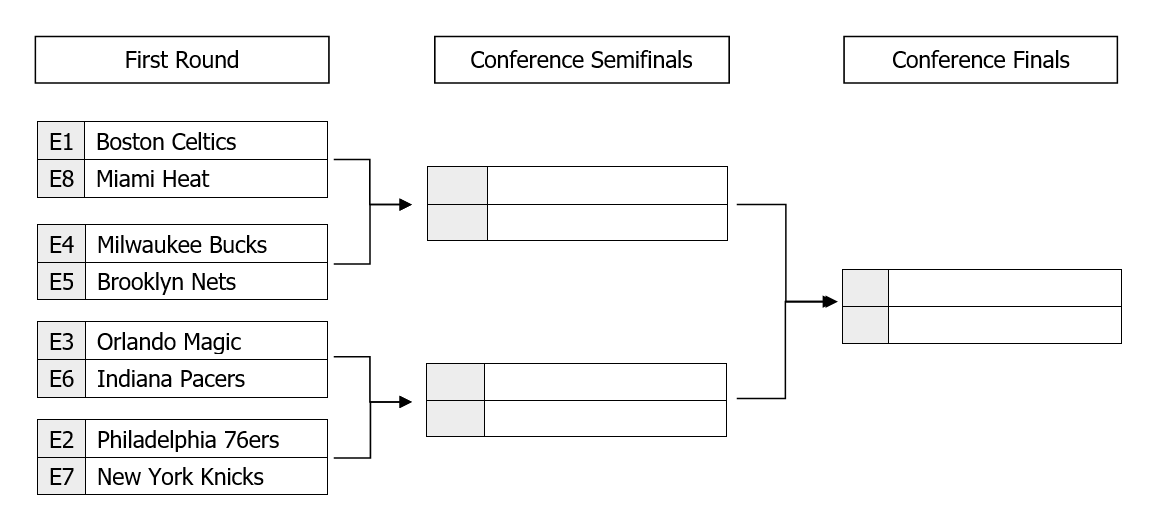

In [58]:
PlayoffSeriesSim("Boston Celtics", "Miami Heat", 1000)

Boston Celtics wins 74.6 % of best-of-7 series
Miami Heat wins 25.4 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  115
Miami Heat Average Score  112


In [59]:
PlayoffSeriesSim("Brooklyn Nets", "Milwaukee Bucks", 1000)

Brooklyn Nets wins 35.2 % of best-of-7 series
Milwaukee Bucks wins 64.8 % of best-of-7 series

The average series score is 4 to 2 

Brooklyn Nets Average Score  117
Milwaukee Bucks Average Score  118


In [60]:
PlayoffSeriesSim("Orlando Magic", "Indiana Pacers", 1000)

Orlando Magic wins 56.6 % of best-of-7 series
Indiana Pacers wins 43.4 % of best-of-7 series

The average series score is 4 to 3 

Orlando Magic Average Score  118
Indiana Pacers Average Score  117


In [61]:
PlayoffSeriesSim("Philadelphia 76ers", "New York Knicks", 1000)

Philadelphia 76ers wins 72.2 % of best-of-7 series
New York Knicks wins 27.8 % of best-of-7 series

The average series score is 4 to 2 

Philadelphia 76ers Average Score  116
New York Knicks Average Score  114


### Eastern Conference Semi-finals

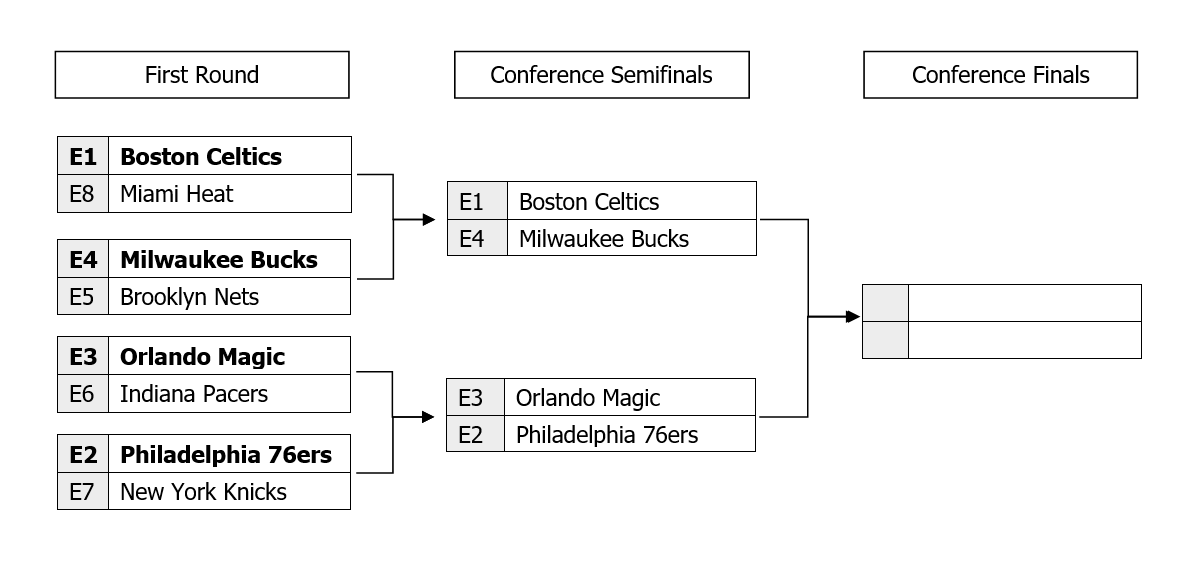

In [41]:
PlayoffSeriesSim("Boston Celtics","Milwaukee Bucks", 1000)

Boston Celtics wins 64.0 % of best-of-7 series
Milwaukee Bucks wins 36.0 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  117
Milwaukee Bucks Average Score  116


In [42]:
PlayoffSeriesSim("Orlando Magic", "Philadelphia 76ers", 1000)

Orlando Magic wins 29.0 % of best-of-7 series
Philadelphia 76ers wins 71.0 % of best-of-7 series

The average series score is 4 to 2 

Orlando Magic Average Score  114
Philadelphia 76ers Average Score  115


The Milwaukee Bucks are eliminated in the Eastern Conference Semifinals

### Eastern Conference Finals

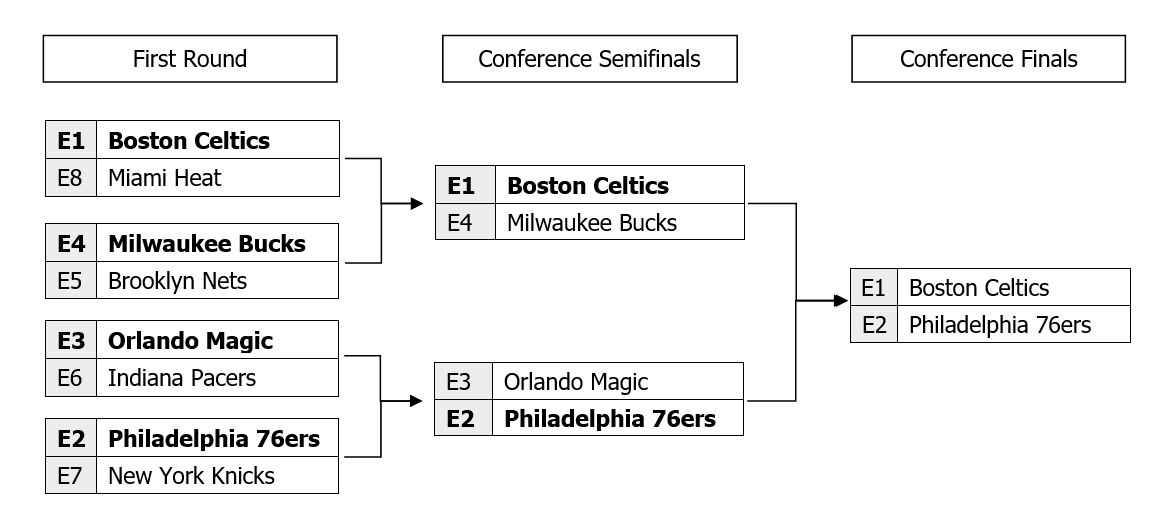

In [43]:
PlayoffSeriesSim("Boston Celtics","Philadelphia 76ers", 1000)

Boston Celtics wins 44.3 % of best-of-7 series
Philadelphia 76ers wins 55.7 % of best-of-7 series

The average series score is 4 to 3 

Boston Celtics Average Score  115
Philadelphia 76ers Average Score  115


### Western Conference First Round

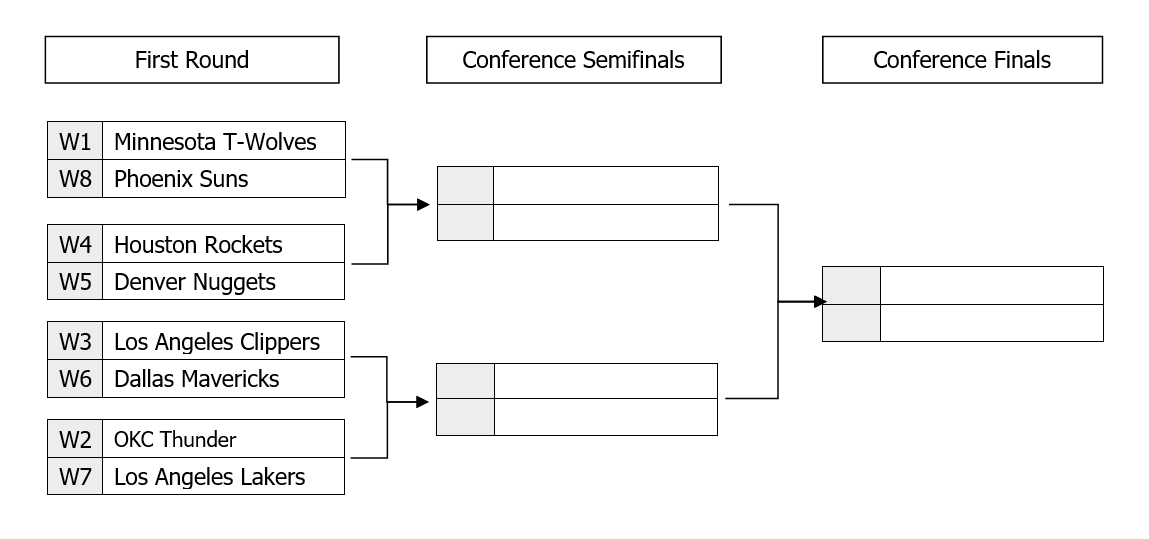

In [44]:
PlayoffSeriesSim("Minnesota Timberwolves", "Phoenix Suns", 1000)

Minnesota Timberwolves wins 65.0 % of best-of-7 series
Phoenix Suns wins 35.0 % of best-of-7 series

The average series score is 4 to 2 

Minnesota Timberwolves Average Score  113
Phoenix Suns Average Score  112


In [45]:
PlayoffSeriesSim("Denver Nuggets", "Houston Rockets", 1000)

Denver Nuggets wins 42.5 % of best-of-7 series
Houston Rockets wins 57.5 % of best-of-7 series

The average series score is 4 to 3 

Denver Nuggets Average Score  112
Houston Rockets Average Score  112


In [46]:
PlayoffSeriesSim("Los Angeles Clippers", "Dallas Mavericks", 1000)

Los Angeles Clippers wins 49.6 % of best-of-7 series
Dallas Mavericks wins 50.4 % of best-of-7 series

The average series score is 4 to 3 

Los Angeles Clippers Average Score  115
Dallas Mavericks Average Score  115


In [47]:
PlayoffSeriesSim("Oklahoma City Thunder", "Los Angeles Lakers", 1000)

Oklahoma City Thunder wins 64.1 % of best-of-7 series
Los Angeles Lakers wins 35.9 % of best-of-7 series

The average series score is 4 to 2 

Oklahoma City Thunder Average Score  116
Los Angeles Lakers Average Score  114


### Western Conference Semi-finals

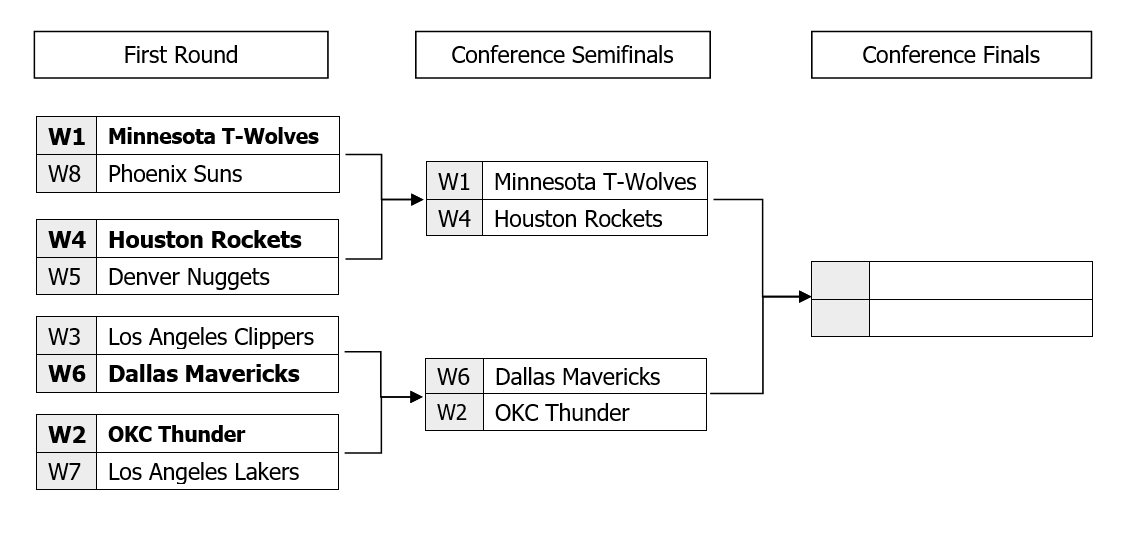

In [48]:
PlayoffSeriesSim("Houston Rockets", "Minnesota Timberwolves", 1000)

Houston Rockets wins 29.0 % of best-of-7 series
Minnesota Timberwolves wins 71.0 % of best-of-7 series

The average series score is 4 to 2 

Houston Rockets Average Score  110
Minnesota Timberwolves Average Score  111


In [49]:
PlayoffSeriesSim("Dallas Mavericks", "Oklahoma City Thunder", 1000)

Dallas Mavericks wins 31.1 % of best-of-7 series
Oklahoma City Thunder wins 68.9 % of best-of-7 series

The average series score is 4 to 2 

Dallas Mavericks Average Score  116
Oklahoma City Thunder Average Score  117


### Western Conference Finals

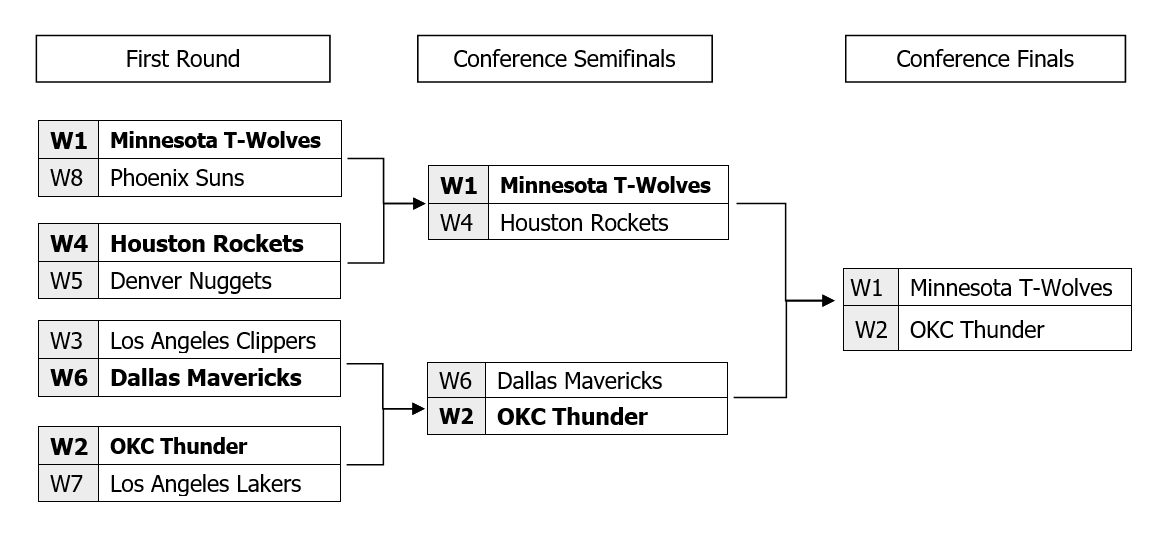

In [50]:
PlayoffSeriesSim("Oklahoma City Thunder", "Minnesota Timberwolves", 1000)

Oklahoma City Thunder wins 45.7 % of best-of-7 series
Minnesota Timberwolves wins 54.3 % of best-of-7 series

The average series score is 4 to 3 

Oklahoma City Thunder Average Score  114
Minnesota Timberwolves Average Score  113


### NBA Finals

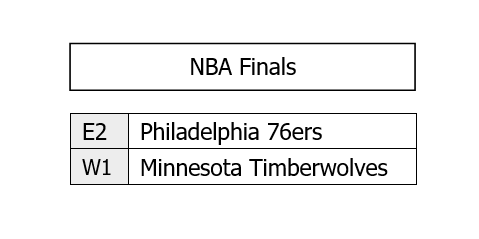

In [51]:
PlayoffSeriesSim("Philadelphia 76ers","Minnesota Timberwolves", 1000)

Philadelphia 76ers wins 55.1 % of best-of-7 series
Minnesota Timberwolves wins 44.9 % of best-of-7 series

The average series score is 4 to 3 

Philadelphia 76ers Average Score  114
Minnesota Timberwolves Average Score  113


## The Philadelphia 76ers win the NBA title